period=7.688181618459404


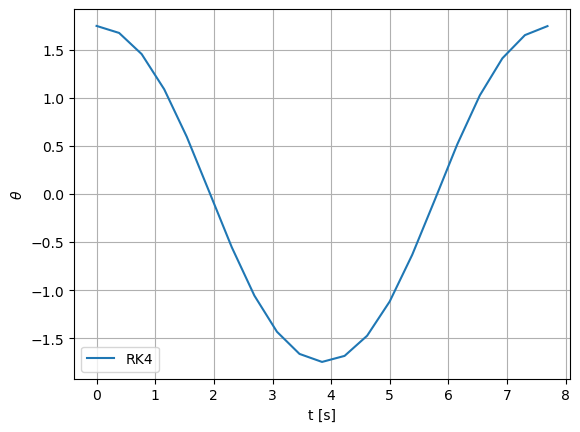

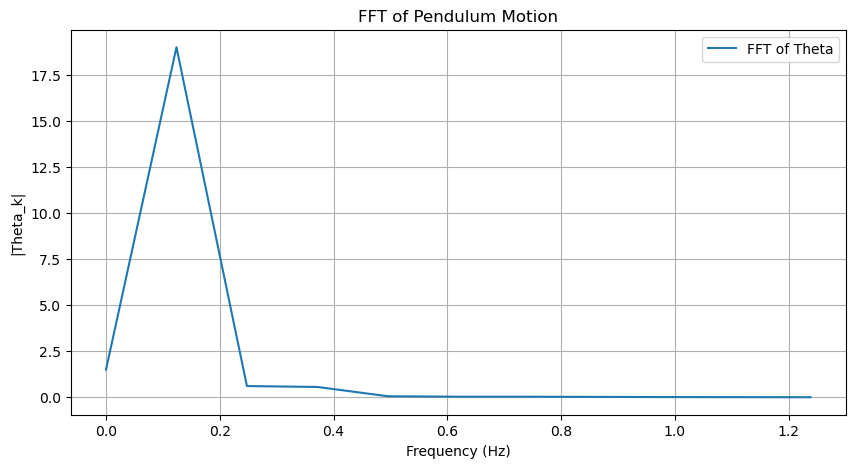

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

class SimplePendulum:
    """ manage and integrate a simple pendulum """

    def __init__(self, theta0, g=9.81, L=9.81):
        """we'll take theta0 in degrees and assume that the angular
        velocity is initially 0"""
        
        # initial condition
        self.theta0 = np.radians(theta0)

        self.g = g
        self.L = L

    def energy(self, theta_vec, omega_vec):
        """ given a solution, return the energy (per unit mass) """
        return (0.5 * self.L**2 * omega_vec**2 -
                self.g * self.L * np.cos(theta_vec))

    def period(self):
        """ return an estimate of the period, up to the theta**2 term """
        return (2.0 * np.pi * np.sqrt(self.L / self.g) *
                (1.0 + self.theta0**2 / 16.0 +
                 11.0 * self.theta0**4 / 3072.0))

    def rhs(self, theta, omega):
        """ equations of motion for a pendulum
              dtheta/dt = omega
              domega/dt = - (g/L) sin theta """

        return np.array([omega, -(self.g / self.L) * np.sin(theta)])


    def integrate_rk4(self, dt, tmax):
        """integrate the equations of motion using 4th order Runge Kutta"""

        # initial conditions
        t = 0.0

        t_s = [t]
        theta_s = [self.theta0]
        omega_s = [0.0]

        while t < tmax:

            dt = min(dt, tmax-t)
            
            # initial state
            theta = theta_s[-1]
            omega = omega_s[-1]
            
            # get the RHS at time-level n
            thetadot1, omegadot1 = self.rhs(theta, omega)

            theta_tmp = theta + 0.5 * dt * thetadot1
            omega_tmp = omega + 0.5 * dt * omegadot1

            thetadot2, omegadot2 = self.rhs(theta_tmp, omega_tmp)

            theta_tmp = theta + 0.5 * dt * thetadot2
            omega_tmp = omega + 0.5 * dt * omegadot2

            thetadot3, omegadot3 = self.rhs(theta_tmp, omega_tmp)

            theta_tmp = theta + dt * thetadot3
            omega_tmp = omega + dt * omegadot3

            thetadot4, omegadot4 = self.rhs(theta_tmp, omega_tmp)

            theta_new = theta + dt / 6.0 * (thetadot1 + 2.0 * thetadot2 +
                                            2.0 * thetadot3 + thetadot4)
            omega_new = omega + dt / 6.0 * (omegadot1 + 2.0 * omegadot2 +
                                            2.0 * omegadot3 + omegadot4)

            t += dt

            # store
            t_s.append(t)
            theta_s.append(theta_new)
            omega_s.append(omega_new)

        return np.array(t_s), np.array(theta_s), np.array(omega_s)

theta0 = 100

p100 = SimplePendulum(theta0)
period = p100.period()
print(f"{period=}")


# fixed timestep
dt = period / 20
tmax = period

t_rk4, theta_rk4, omega_rk4 = p100.integrate_rk4(dt, tmax)



### Plotting included just to see

fig, ax = plt.subplots()
ax.plot(t_rk4, theta_rk4, label="RK4")

ax.legend()
ax.set_xlabel("t [s]")
ax.set_ylabel(r"$\theta$")

ax.grid()

# Compute FFT
fft_theta = rfft(theta_rk4)
freqs = rfftfreq(len(t_rk4), dt)

# Plot FFT
plt.figure(figsize=(10, 5))
plt.plot(freqs, np.abs(fft_theta), label='FFT of Theta')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Theta_k|')
plt.title('FFT of Pendulum Motion')
plt.legend()
plt.grid()
plt.show()





******** For the 10 periods, we get a theta 10 times larger than the one we did for the 1 period. This makes sense as a higher number of cycles leads to a larger magnitude in the fft, and the theta is all that changes while the frequency has stayed the same. I am assuming the frequency of about 0.1 Hz is the resonant frequency.

******** As for the code I took the HW3 RK4 integration and added the graphing and calculations of the fft using the scipy libraries.

period=7.688181618459404


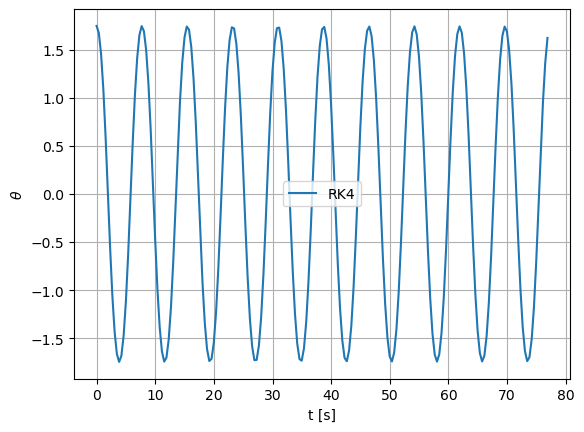

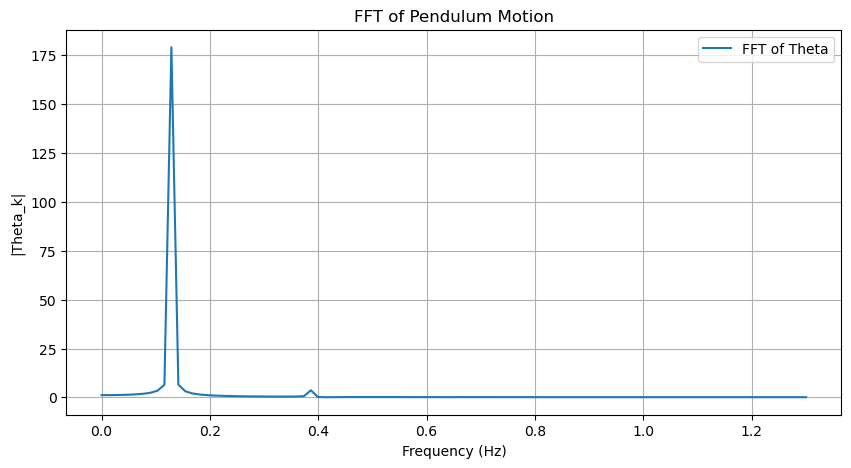

In [19]:
## Redo for 10 periods

p100 = SimplePendulum(theta0)
period = p100.period()
print(f"{period=}")


# fixed timestep
dt = period / 20
tmax = 10*period

t_rk4, theta_rk4, omega_rk4 = p100.integrate_rk4(dt, tmax)



### Plotting included just to see

fig, ax = plt.subplots()
ax.plot(t_rk4, theta_rk4, label="RK4")

ax.legend()
ax.set_xlabel("t [s]")
ax.set_ylabel(r"$\theta$")

ax.grid()

# Compute FFT
fft_theta = rfft(theta_rk4)
freqs = rfftfreq(len(t_rk4), dt)

# Plot FFT
plt.figure(figsize=(10, 5))
plt.plot(freqs, np.abs(fft_theta), label='FFT of Theta')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Theta_k|')
plt.title('FFT of Pendulum Motion')
plt.legend()
plt.grid()
plt.show()